In [1]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9

In [4]:
kidiq=pd.read_csv("kidiq.csv")

In [5]:
kidiq

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [6]:
results = smf.ols('kid_score ~ mom_hs', data=kidiq).fit()
wyn=results.params

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     25.69
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           5.96e-07
Time:                        16:31:47   Log-Likelihood:                -1911.8
No. Observations:                 434   AIC:                             3828.
Df Residuals:                     432   BIC:                             3836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.5484      2.059     37.670      0.000      73.502      81.595
mom_hs        11.7713      2.322      5.069      0.000       7.207      16.336
==============================================================================
Omnibus:                       11.077   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.316
Skew:                          -0.373   Prob(JB):                      0.00349
Kurtosis:                       2.738   Cond. No.                         4.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
fig1=(p9.ggplot(p9.aes(x='mom_hs',y='kid_score'),data=kidiq)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['mom_hs'])))

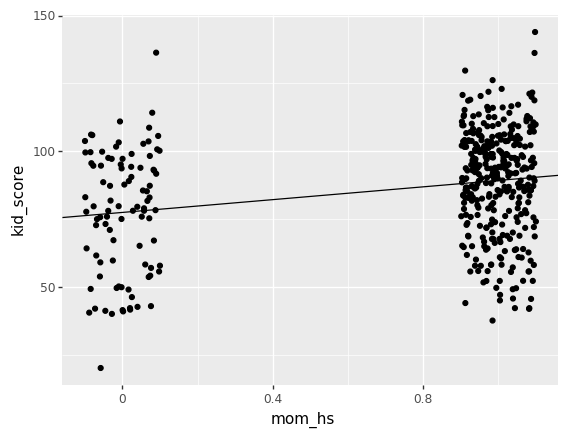

<ggplot: (-9223371949935219768)>

In [9]:
fig1

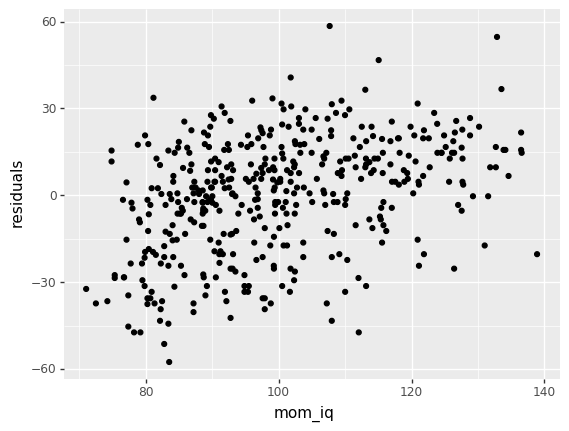

<ggplot: (-9223371949935067872)>

In [10]:
df=kidiq
df['kid_score_pred']=results.predict()
df['residuals']=df['kid_score']-df['kid_score_pred']
fig1_res=(p9.ggplot(p9.aes(x='mom_iq',y='residuals'),data=kidiq)
      +p9.geom_point())
fig1_res

In [11]:
results = smf.ols('kid_score ~ mom_iq', data=kidiq).fit()
wyn=results.params
df['kid_score_pred']=results.predict()
df['residuals']=df['kid_score']-df['kid_score_pred']


In [12]:
fig2=(p9.ggplot(p9.aes(x='mom_iq',y='kid_score'),data=kidiq)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['mom_iq'])))

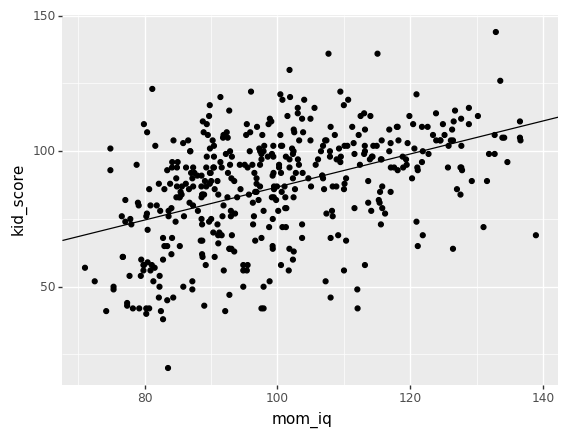

<ggplot: (-9223371949937334447)>

In [13]:
fig2

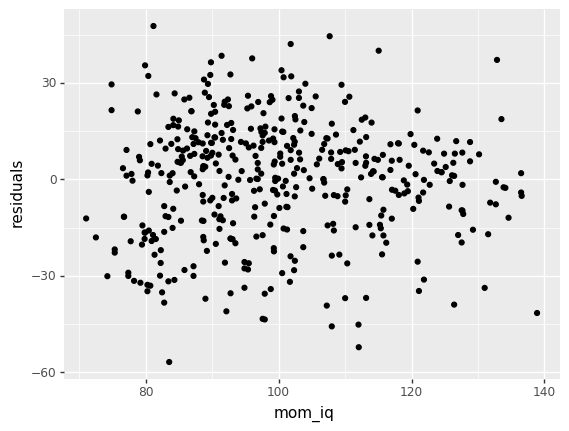

<ggplot: (-9223371949935130978)>

In [14]:
fig2_res=(p9.ggplot(p9.aes(x='mom_iq',y='residuals'),data=kidiq)
      +p9.geom_point())
fig2_res

In [15]:
results = smf.ols('kid_score ~ mom_iq+mom_hs', data=kidiq).fit()
wyn=results.params
df['kid_score_pred']=results.predict()
df['residuals']=df['kid_score']-df['kid_score_pred']

In [16]:
wyn

Intercept    25.731538
mom_iq        0.563906
mom_hs        5.950117
dtype: float64

In [59]:
fig3=(p9.ggplot(p9.aes(x='mom_iq',y='kid_score',color='mom_hs'),data=kidiq)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['mom_iq']))
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept']+wyn['mom_hs'],slope=wyn['mom_iq']))     )

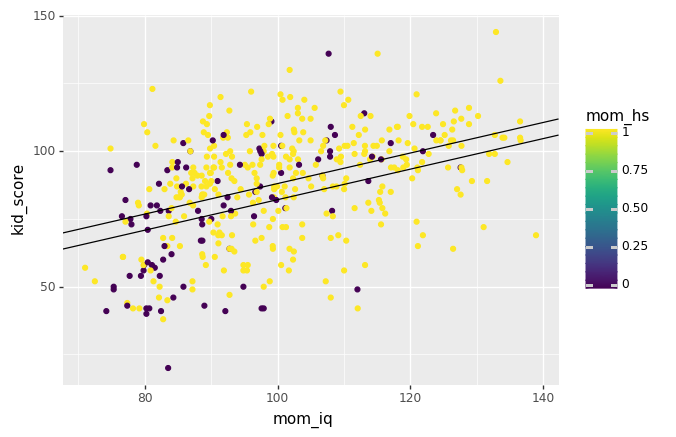

<ggplot: (7555499689)>

In [60]:
fig3

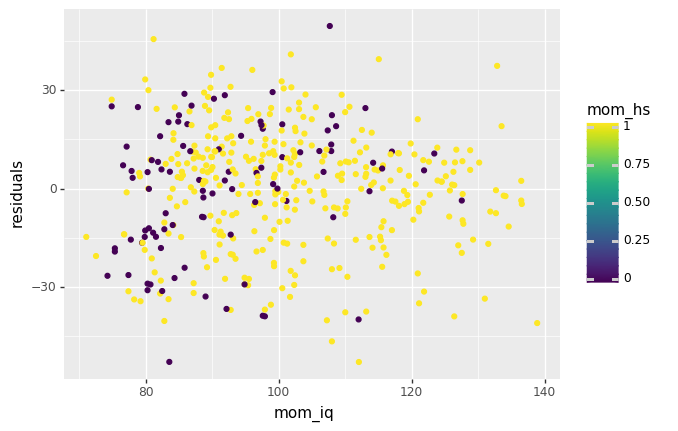

<ggplot: (-9223372029298739263)>

In [61]:
fig3_res=(p9.ggplot(p9.aes(x='mom_iq',y='residuals',color='mom_hs'),data=kidiq)
      +p9.geom_point())
fig3_res

In [63]:
results = smf.ols('kid_score ~ mom_iq+mom_hs+mom_iq*mom_hs', data=kidiq).fit()
wyn=results.params

In [64]:
wyn

Intercept       -11.482021
mom_iq            0.968889
mom_hs           51.268223
mom_iq:mom_hs    -0.484275
dtype: float64

In [65]:
fig4=(p9.ggplot(p9.aes(x='mom_iq',y='kid_score',color='mom_hs'),data=kidiq)
      +p9.geom_point()
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['mom_iq']))
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept']+wyn['mom_hs'],slope=wyn['mom_iq']+wyn['mom_iq:mom_hs']))     )

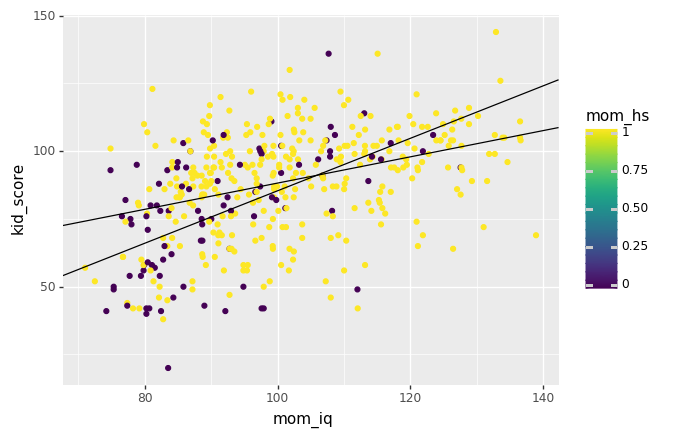

<ggplot: (-9223372029298739242)>

In [66]:
fig4

In [67]:
df['kid_score_pred']=results.predict()
df['residuals']=df['kid_score']-df['kid_score_pred']
fig4_res=(p9.ggplot(p9.aes(x='mom_iq',y='residuals',color='mom_hs'),data=kidiq)
      +p9.geom_point())

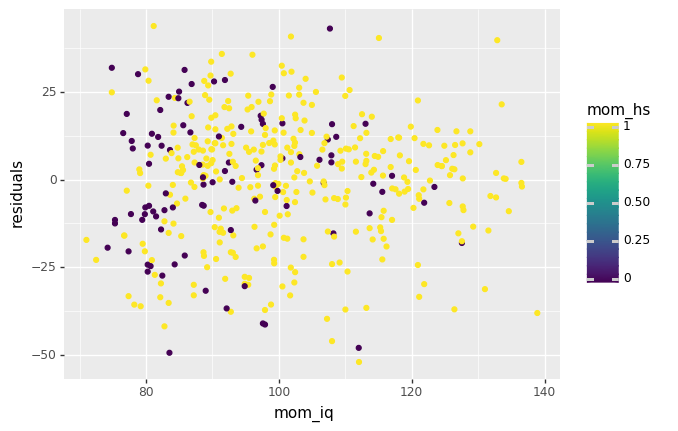

<ggplot: (7556422720)>

In [68]:
fig4_res